In [1]:
#Import Necessary librarires 

import numpy as np
import pandas as pd
import warnings         
warnings.filterwarnings('ignore')   #warning module is used to warnings that you don't want to see.It suppresses warnings 

In [2]:
pip install xgboost  #to install the xgboost library


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#to'


In [3]:
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,OrdinalEncoder

from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

Gradient boosting is a technique where models are built sequentially, with each new model correcting the errors of the previous ones.XGBoost is a specific implementation of gradient boosting that is highly efficient and effective.

In [4]:
# 1.Reading the Dataset   
def read_csv(file_path):    #Remember indentation is important in python
 """
    Read data from a CSV file and return a pandas DataFrame.

    Parameters:
    - file_path: str, the path to the CSV file.

    Returns:
    - pd.DataFrame, the loaded DataFrame.
    """
 return pd.read_csv(file_path)

#2. Getting information and statistics about over dataset
def dataset_info_statistics(data):
    """
    Display information and basic statistics about the dataset.

    Parameters:
    - data: pandas DataFrame, input data.

    Returns:
    - None
    """
    # Display general information about the dataset
    print("Dataset Information:")
    print(data.info())
    print("\n")

    # Display basic statistics for numerical columns
    print("Basic Statistics for Numerical Columns:")
    print(data.describe())
    print("\n")
    
#3.check for the null values in the dataset
def check_null(data):
    """
    Check for null values in the dataset.

    Parameters:
    - data: pandas DataFrame, input data.

    Returns:
    - pd.Series, the count of null values for each column.
    """
    null_counts = data.isnull().sum()
    print("Null Values in the Dataset:")
    return null_counts

#4.check for duplicated rows in the dataset
def check_duplicates(data):
    """
    Check for duplicated rows in the dataset.

    Parameters:
    - data: pandas DataFrame, input data.

    Returns:
    - bool, True if any duplicated rows exist, False otherwise.
    """
    return data.duplicated().any()


#5. getting basic analysis for numerical and categorical columns
def plot_graph(data):
    """
    Plot graphs for numerical and categorical data in a dataframe.
    
    Parameters:
    - data: Pandas Dataframe, input data.
    
    Returns:
    - None
    
    """
    numerical_columns = data.select_dtypes(include=np.number).columns
     
    for column in numerical_columns:
        plt.figure(figsize=(5,3))
        sns.histplot(data[column],kde=True)
        plt.title(f"Histogram for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()
        
        
        
#6. Seperate feature and target
def seperate_features_target(data,target_column):
    """
    Separate features and target variable
    
    Parameters: 
    - data: pandas DataFrame, input data.
    - target_column: str, the column representing the target varible.
    
    Returns:
    - X: pandas DataFrame, features.
    - y: pandas Series, target variable.
    
    """
    
    X = data.drop(columns=[target_column],axis=1)
    y = data[target_column]
    
    return X,y

#7. Train test split
def perform_train_test_split(X, y, test_size=0.20, random_state=42):
    """
    Perform train-test split on the dataset.

    Parameters:
    - X: pandas DataFrame, features.
    - y: pandas Series, target variable.
    - test_size: float, optional, the proportion of the dataset to include in the test split (default is 0.2).
    - random_state: int or None, optional, seed for random number generation (default is None).

    Returns:
    - X_train: pandas DataFrame, features for training.
    - X_test: pandas DataFrame, features for testing.
    - y_train: pandas Series, target variable for training.
    - y_test: pandas Series, target variable for testing.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test
        
   
    

In [5]:
calories =read_csv(r"C:\Users\user\Desktop\Projects\calories.csv")
exercise=read_csv(r"C:\Users\user\Desktop\Projects\exercise.csv")

In [6]:
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [7]:
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [8]:
#Now we can observe user_id column is common in both the dataframe...so we can manage to merge both the dataset

data = pd.merge(calories, exercise, on='User_ID')

In [9]:
data  #calories is the target variable

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,male,78,193.0,97.0,2.0,84.0,38.3


In [10]:
dataset_info_statistics(data)  #2nd function

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB
None


Basic Statistics for Numerical Columns:
            User_ID      Calories           Age        Height        Weight  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     89.539533     42.789800    174.465133     74.966867   
std    2.872851e+06     62.456978     16.980264     14.258114     15.03565

In [11]:
check_null(data)  #3rd function

Null Values in the Dataset:


User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [12]:
check_duplicates(data)  #4th function

False

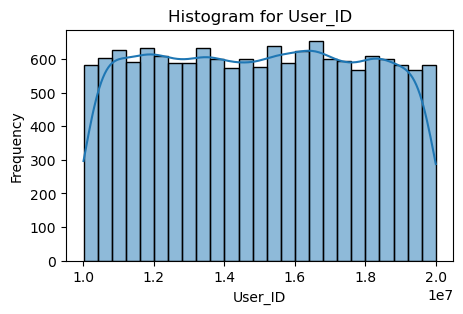

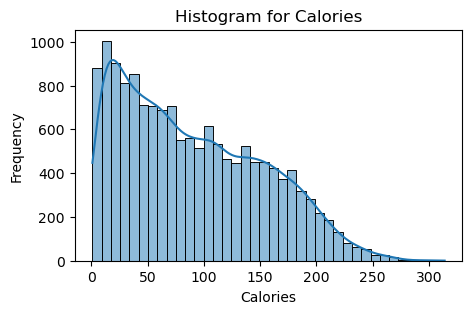

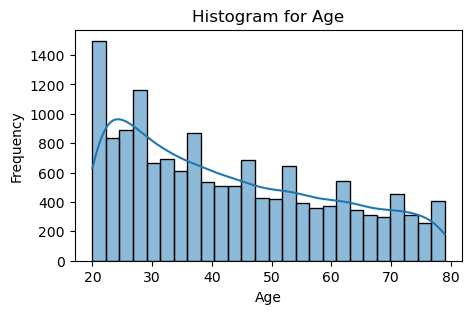

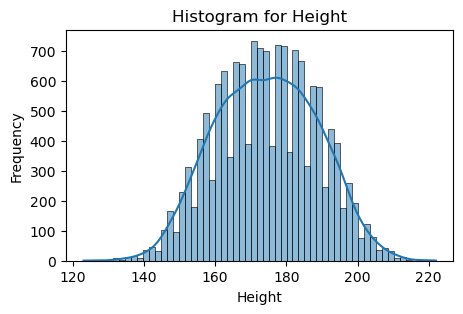

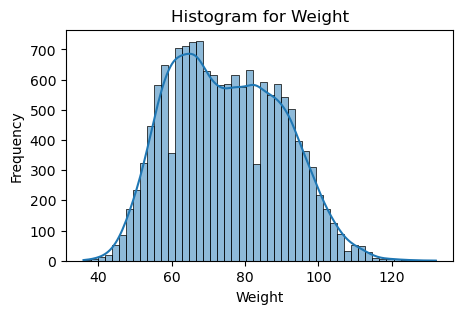

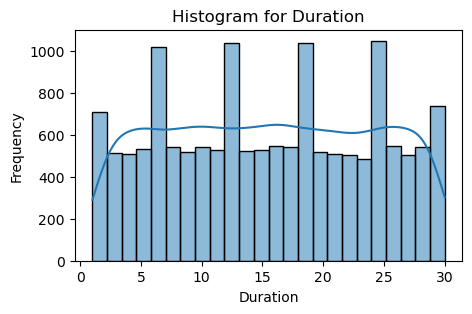

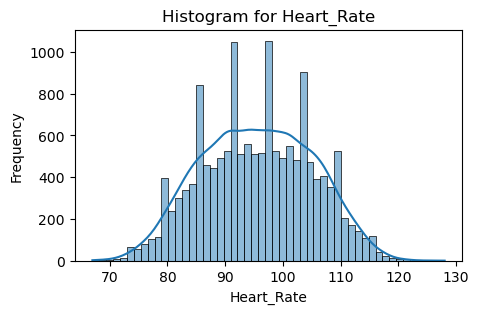

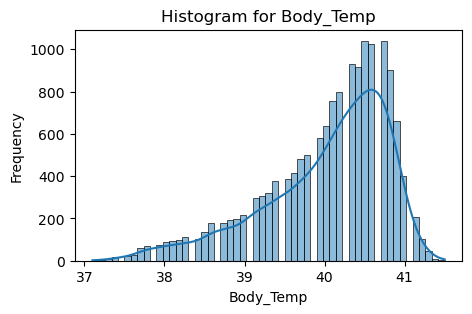

In [13]:
plot_graph(data)

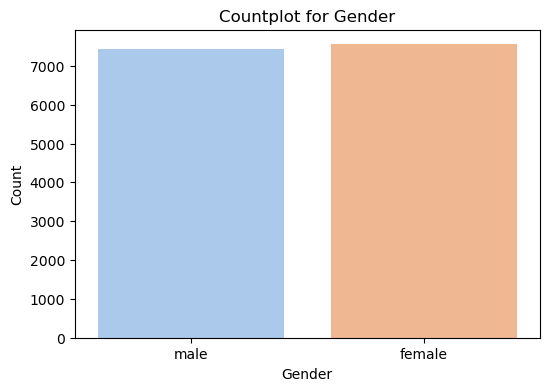

In [14]:

data = pd.DataFrame(data)

# Plotting countplot for the 'gender' column
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', palette='pastel')  # Specify the 'x' parameter
plt.title('Countplot for Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [15]:
data.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [16]:
X,y = seperate_features_target(data,'Calories')  #calories is the target variable

In [17]:
X.head()  #independent variable

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [18]:
y.head()  #target variable(calories)

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [19]:
X = X.drop(columns=['User_ID'],axis=1)

In [20]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8


In [21]:
X_train,X_test,y_train,y_test = perform_train_test_split(X, y)

In [22]:
X_train

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
9839,male,37,179.0,77.0,7.0,81.0,39.5
9680,male,23,195.0,87.0,26.0,110.0,40.5
7093,male,33,181.0,77.0,12.0,88.0,40.1
11293,female,66,156.0,54.0,9.0,77.0,39.5
820,female,32,144.0,49.0,5.0,90.0,39.0
...,...,...,...,...,...,...,...
5191,female,75,148.0,51.0,22.0,104.0,40.6
13418,female,21,172.0,67.0,20.0,104.0,40.7
5390,male,57,189.0,92.0,8.0,90.0,39.5
860,male,35,174.0,76.0,12.0,97.0,40.2


In [23]:
X.shape  #the original amount of data

(15000, 7)

In [24]:
X_train.shape  #it means 80 perecent is used for training 

(12000, 7)

In [25]:
X_test.shape  #it contains 20 percent to train

(3000, 7)

Column Transformer and Pipeline

In [26]:
preprocessor = ColumnTransformer(transformers=[
    ('ordinal',OrdinalEncoder(),['Gender']),
    ('num',StandardScaler(),['Age',
                            'Height',
                            'Weight',
                            'Duration',
                            'Heart_Rate',
                            'Body_Temp']),
],remainder='passthrough')

OrdinalEncoder() is used to convert categorical data (like 'Male' or 'Female' in the 'Gender' column)
into numerical values.
StandardScaler() is used to standardize numerical data in certain columns. 
This means it scales the values so that they have a mean of 0 and a standard deviation of 1.

ColumnTransformer as a helper that takes care of applying different treatments to different columns in your data table, making sure each column gets the right kind of attention before you feed it into your machine learning model.

In [27]:
pipeline = Pipeline([("preprocessor",preprocessor),
                     ("model",LinearRegression())
                    ])

The pipeline has two main components:
"preprocessor": 
This is the preprocessing part of the pipeline, which you've defined earlier using the preprocessor object. 
It includes steps like encoding categorical variables and scaling numerical features.
"model": This is the machine learning model part of the pipeline. In this case, it's a linear regression model.

In [28]:
from sklearn import set_config  #set_config is used to display the  pipeline

In [29]:
set_config(display='diagram')

In [30]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [31]:
pipeline.fit(X_train,y_train)   #pipeline is like a recipe for processing and modeling data. It combines different steps, such as data preprocessing and model training, into a single structure.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [32]:
y_pred = pipeline.predict(X_test)

In [33]:
y_pred

array([170.67646027, 192.08857813,  56.14796403, ..., 129.66570069,
         2.4152784 , 191.99081681])

In [34]:
r2_score(y_test,y_pred)

0.9672937151257295

A R-squared value of approximately 0.9673 for predicting calories in a machine learning model is generally considered very high. This suggests that model is able to explain about 96.73% of the variability in the target variable (calories). In the context of predicting calories, a high R-squared is a positive sign, indicating that your model is capturing the patterns and relationships in the data effectively.

In [35]:
from sklearn.metrics import mean_absolute_error

In [36]:
mean_absolute_error (y_test,y_pred)  #testing the y test n y pred MSE

8.441513553849704

 an MAE of 8.44 calories can be considered reasonabl

In [37]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  #coz we are pperforming 5 fold cross validation

In [38]:
cv_results = cross_val_score(pipeline,X,y,cv = kfold,scoring='r2' )

In [39]:
cv_results

array([0.96729372, 0.96543156, 0.9674671 , 0.96819535, 0.96731342])

In [40]:
cv_results.mean()

0.9671402283675841

In [41]:
def model_scorer(model_name, model):
    """
    Evaluate the performance of a machine learning model using R2 score, Mean absolute error, and Cross-validation.

    Parameters:
    - model_name: str, name for the model.
    - model: machine learning model, the model to be evaluated.

    Returns:
    - output: list, containing model name, R2 score, Mean absolute error, and Cross-Validation R2 score
    """

    # Create an empty list to store the results
    output = []

    # Add the model name to the output list
    output.append(model_name)

    # Create a machine learning pipeline with preprocessing and the specified model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = pipeline.predict(X_test)

    # Calculate and add R2 score to the output list
    output.append(r2_score(y_test, y_pred))

    # Calculate and add Mean Absolute Error to the output list
    output.append(mean_absolute_error(y_test, y_pred))

    # Perform 5-fold cross-validation and calculate the mean R2 score
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')
    output.append(cv_results.mean())

    # Return the output list containing model name, R2 score, MAE, and Cross-Validation R2 score
    return output


In [42]:
model_dict={
    'log':LinearRegression(),
    'RF':RandomForestRegressor(),
    'XGBR':XGBRegressor(),
}

The model_dict is used to organize and store multiple machine learning models in a structured manner. It provides a convenient way to iterate over different models, apply a common evaluation process, and compare their performance. 
Instead of defining and managing individual model instances separately, the model_dict allows you to group multiple models together in a single data structure.

In [43]:
model_output=[]    #applied for loop
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

You can easily iterate over the models using a loop, applying the same evaluation process to each model.
This promotes code reusability and makes it easier to experiment with different algorithms.

In [44]:
model_output

[['log', 0.9672937151257295, 8.441513553849704, 0.9671402283675841],
 ['RF', 0.9982667255466606, 1.6883799999999998, 0.9979207804703198],
 ['XGBR', 0.9988678909361673, 1.4981198125282924, 0.9988510864545181]]

In [45]:
preprocessor = ColumnTransformer(transformers=[
    ('ordinal',OrdinalEncoder(),['Gender']),
    ('num',StandardScaler(),['Age',
                            'Height',
                            'Weight',
                            'Duration',
                            'Heart_Rate',
                            'Body_Temp']),
    
],remainder='passthrough')

In [46]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',XGBRegressor())
    
])

In [47]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [48]:
sample = pd.DataFrame({
   'Gender':'male',
    'Age':68,
    'Height':190.0,
    'Weight':94.0,
    'Duration':29.0,
    'Heart_Rate':105.0,
    'Body_Temp':40.8,
},index=[0])

In [49]:
pipeline.predict(sample) #231.0721 calories burnt values

array([231.0721], dtype=float32)

Saving the model

In [50]:
import pickle  #pickle helps us to save and later bring back our Python objects/files. It's handy for storing things we want to use again in the future.

In [51]:
with open('pipeline.pkl','wb') as f:    #Save your Machine Learning Model
    pickle.dump(pipeline,f)

In [52]:
with open('pipeline.pkl','rb') as f:    #Load your Saved Model
    pipeline_saved = pickle.load(f)

In [53]:
result = pipeline_saved.predict(sample)   #Make Predictions with the Loaded Model

In [54]:
result

array([231.0721], dtype=float32)

GUI 

In [ ]:
import pickle
import pandas as pd
from tkinter import *

def show_entry():
    
    with open('pipeline.pkl','rb') as f:
        pipeline = pickle.load(f)

    p1 = str(clicked.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())

    sample = pd.DataFrame({
    'Gender':[p1],
    'Age':[p2],
    'Height':[p3],
    'Weight':[p4],
    'Duration':[p5],
    'Heart_Rate':[p6],
    'Body_Temp':[p7],
},index=[0])

    result = pipeline.predict(sample)
    print(result)
    Label(master, text="Amount of Calories Burnt").grid(row=13)
    Label(master, text=result[0]).grid(row=14)
        
    
master =Tk()
master.title("Calories Burnt Prediction using Machine Learning")
label = Label(master,text = "Calories Burnt Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Select Gender").grid(row=1)
Label(master,text = "Enter Your Age").grid(row=2)
Label(master,text = "Enter Your Height").grid(row=3)
Label(master,text = "Enter Your Weight").grid(row=4)
Label(master,text = "Duration").grid(row=5)
Label(master,text = "Heart Rate").grid(row=6)
Label(master,text = "Body Temp").grid(row=7)

clicked = StringVar()
options = ['male', 'female']

e1 = OptionMenu(master , clicked , *options )
e1.configure(width=15)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)



Button(master,text="Predict",command=show_entry).grid()

mainloop()